# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
#get URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key= "3401cd7564e299f07b11cf5de47a504e"
units = "Imperial"
query_url=(f'{base_url}appid={api_key}&units={units}')


#make dictionary {} : 
weatherData = {'city_list': [],
                'temp': [],
                'lat': [],
                'humid': [],
                'cloud': [],
                'wind': []}

print("Begin API Call to OpenWeather Database ")
#start counter
count=1

for citi in cities:
    try:
        response=requests.get(f'{query_url}&q= {citi}')
    
        city_weather = response.json()
       
        if response.status_code==requests.codes.ok:
        
            print(f'Processing # {count} of {count} for {citi}')
   
     
            weatherData['wind'] = (city_weather['wind']['speed'])
            weatherData['city_list'].append(citi)
            weatherData['temp'].append(city_weather['main']['temp']) 
            weatherData['lat'].append(city_weather['coord']['lat'])
            weatherData['humid'].append(city_weather['main']['humidity'])
            weatherData['cloud'].append(city_weather['clouds']['all'])
        
            count+=1
        
        
        else:
            print(f'There is an error.  Skipping...')
            
   
    except:
        print("Error")




Begin API Call to OpenWeather Database 
Processing # 1 of 1 for butaritari
Processing # 2 of 2 for paragominas
There is an error.  Skipping...
Processing # 3 of 3 for tuatapere
Processing # 4 of 4 for kaeo
There is an error.  Skipping...
There is an error.  Skipping...
Processing # 5 of 5 for taltal
There is an error.  Skipping...
Processing # 6 of 6 for hermanus
Processing # 7 of 7 for kawalu
Processing # 8 of 8 for mount gambier
Processing # 9 of 9 for melville
There is an error.  Skipping...
There is an error.  Skipping...
Processing # 10 of 10 for kruisfontein
Processing # 11 of 11 for camacha
Processing # 12 of 12 for chuy
Processing # 13 of 13 for bedesa
Processing # 14 of 14 for khatanga
Processing # 15 of 15 for lieksa
Processing # 16 of 16 for saskylakh
Processing # 17 of 17 for ovalle
There is an error.  Skipping...
Processing # 18 of 18 for cape town
Processing # 19 of 19 for veraval
Processing # 20 of 20 for lake cowichan
Processing # 21 of 21 for albany
Processing # 22 of 

Error
Processing # 199 of 199 for amatitan
Processing # 200 of 200 for inhambane
Processing # 201 of 201 for ust-nera
Processing # 202 of 202 for ribeira grande
Processing # 203 of 203 for bethel
There is an error.  Skipping...
Processing # 204 of 204 for kodiak
Processing # 205 of 205 for barcelona
Processing # 206 of 206 for suntar
There is an error.  Skipping...
Processing # 207 of 207 for sistranda
There is an error.  Skipping...
Processing # 208 of 208 for dauriya
Processing # 209 of 209 for cairns
Processing # 210 of 210 for sorland
Processing # 211 of 211 for krasnovishersk
Processing # 212 of 212 for maun
Processing # 213 of 213 for waingapu
There is an error.  Skipping...
Processing # 214 of 214 for trairi
Processing # 215 of 215 for lincoln
Processing # 216 of 216 for lorengau
Processing # 217 of 217 for gamba
Processing # 218 of 218 for klyuchi
There is an error.  Skipping...
Error
Processing # 219 of 219 for nuuk
Processing # 220 of 220 for vladyslavivka
Processing # 221 of

Processing # 394 of 394 for cayenne
Error
Processing # 395 of 395 for bodden town
Processing # 396 of 396 for san ignacio
Processing # 397 of 397 for havre-saint-pierre
Processing # 398 of 398 for nizhnyaya tavda
Processing # 399 of 399 for tiznit
Processing # 400 of 400 for ibra
Processing # 401 of 401 for polyarnyy
Processing # 402 of 402 for ormond beach
There is an error.  Skipping...
Processing # 403 of 403 for vanimo
There is an error.  Skipping...
Processing # 404 of 404 for pangkalanbuun
Processing # 405 of 405 for brejo santo
Processing # 406 of 406 for talaya
Processing # 407 of 407 for nyurba
Processing # 408 of 408 for isangel
Processing # 409 of 409 for isla vista
Processing # 410 of 410 for egvekinot
Processing # 411 of 411 for kharp
There is an error.  Skipping...
Processing # 412 of 412 for verkh-usugli
Processing # 413 of 413 for arman
Processing # 414 of 414 for lewistown
There is an error.  Skipping...
Processing # 415 of 415 for kyren
Processing # 416 of 416 for hob

[]


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
weatherData_df = pd.DataFrame(weatherData)
weatherData_df

,city_list,temp,lat,humid,cloud,wind
0,butaritari,76.12,3.07,100,92,1.25
1,paragominas,73.47,-2.97,100,88,1.25
2,tuatapere,64.00,-46.13,94,0,1.25
3,kaeo,62.89,-35.10,81,0,1.25
4,taltal,73.47,-25.40,63,0,1.25
5,hermanus,65.79,-34.42,81,0,1.25
6,kawalu,65.82,-7.38,97,64,1.25
7,mount gambier,50.00,-37.83,71,90,1.25
8,melville,31.24,40.79,36,20,1.25
9,kruisfontein,67.75,-34.00,76,0,1.25


In [22]:
#Export the city data into a .csv.
weatherData_df.to_csv("weather.csv")
weatherData_df=pd.DataFrame(weatherData)
#Display the DataFrame
weatherData_df

,city_list,temp,lat,humid,cloud,wind
0,butaritari,76.12,3.07,100,92,1.25
1,paragominas,73.47,-2.97,100,88,1.25
2,tuatapere,64.00,-46.13,94,0,1.25
3,kaeo,62.89,-35.10,81,0,1.25
4,taltal,73.47,-25.40,63,0,1.25
5,hermanus,65.79,-34.42,81,0,1.25
6,kawalu,65.82,-7.38,97,64,1.25
7,mount gambier,50.00,-37.83,71,90,1.25
8,melville,31.24,40.79,36,20,1.25
9,kruisfontein,67.75,-34.00,76,0,1.25


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

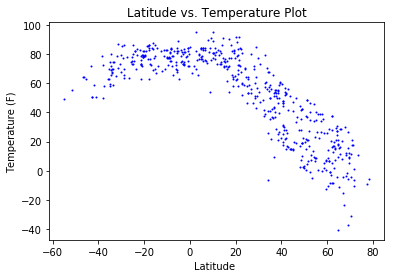

In [26]:
plt.scatter(weatherData_df['lat'],weatherData_df['temp'], s=1, c="blue")
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude ")
plt.ylabel("Temperature (F)")
plt.savefig('temp.png')
plt.show()


#### Latitude vs. Humidity Plot

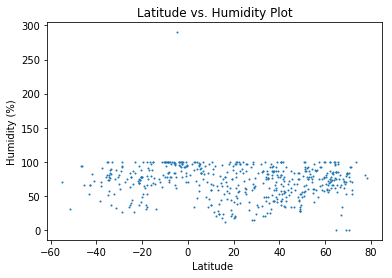

In [27]:
plt.scatter(weatherData_df['lat'],weatherData_df['humid'],s=1)
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude ")
plt.ylabel("Humidity (%)")
plt.savefig('humidity.png')
plt.show()


#### Latitude vs. Cloudiness Plot

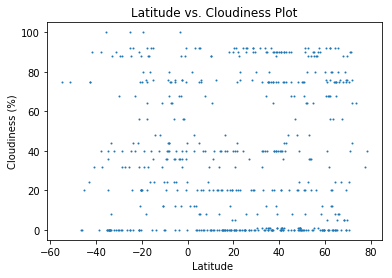

In [28]:
plt.scatter(weatherData_df['lat'],weatherData_df['cloud'],s =1)
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude ")
plt.ylabel("Cloudiness (%)")
plt.savefig('cloudiness.png')
plt.show()


#### Latitude vs. Wind Speed Plot

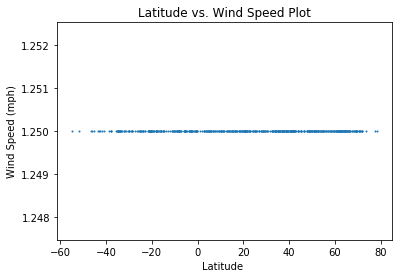

In [29]:
plt.scatter(weatherData_df['lat'],weatherData_df['wind'], s = 1)
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude ")
plt.ylabel("Wind Speed (mph)")
plt.savefig('wind.png')
plt.show()

Analysis:

1.  Wind speed has little variation at all regardless of the latitude.
2.  There is quite a bit of variation of cloudiness throughout the globe, but there is no relationship to latitude.
3.  Generally, as the latitude increases we can see a decrease in temperature but further regression analysis is needed.